In [1]:
!pip install scanpy
!pip install KDEpy
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.1/122.1 kB 130.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 121.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 121.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 131.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 113.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=eaf3ead87eb222d55

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.1 MB/s eta 0:00:00a 0:00:01


# Analysis of clusters in sample S3

In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.stats import ranksums, spearmanr, kendalltau

import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools.util_probe as up
import tools.util as ut
import tools.NB_est as nb
import tools.countsplit as cs
import tools.ClusterDE as cd

import importlib

In [2]:
import importlib

## Preprocessing
### Read data

In [3]:
data_gene = sc.read_h5ad("../../data/MOBA_scRNAseq/outs_S3/filtered_data_maxpool_processed.h5ad")


/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


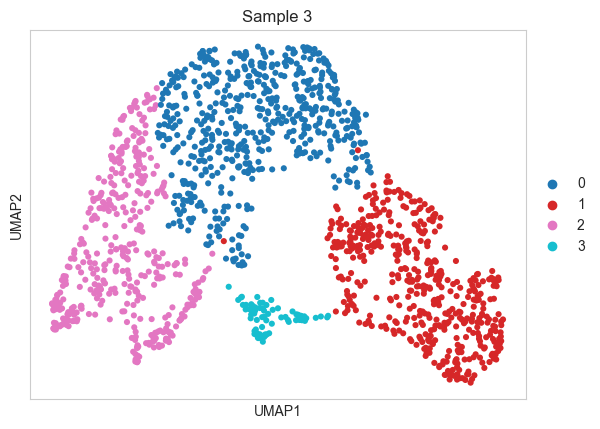

In [4]:
sc.tl.leiden(data_gene, resolution=0.15, key_added="leiden_opt", random_state=1234)
sc.pl.umap(data_gene, color="leiden_opt", palette="tab10", title="Sample 3")
plt.show()

## Initial DE testing: Wilcoxon rank-sum for every cluster against all others

/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/johannes.ostner/opt/anaconda3/envs/BacSC2/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[grou

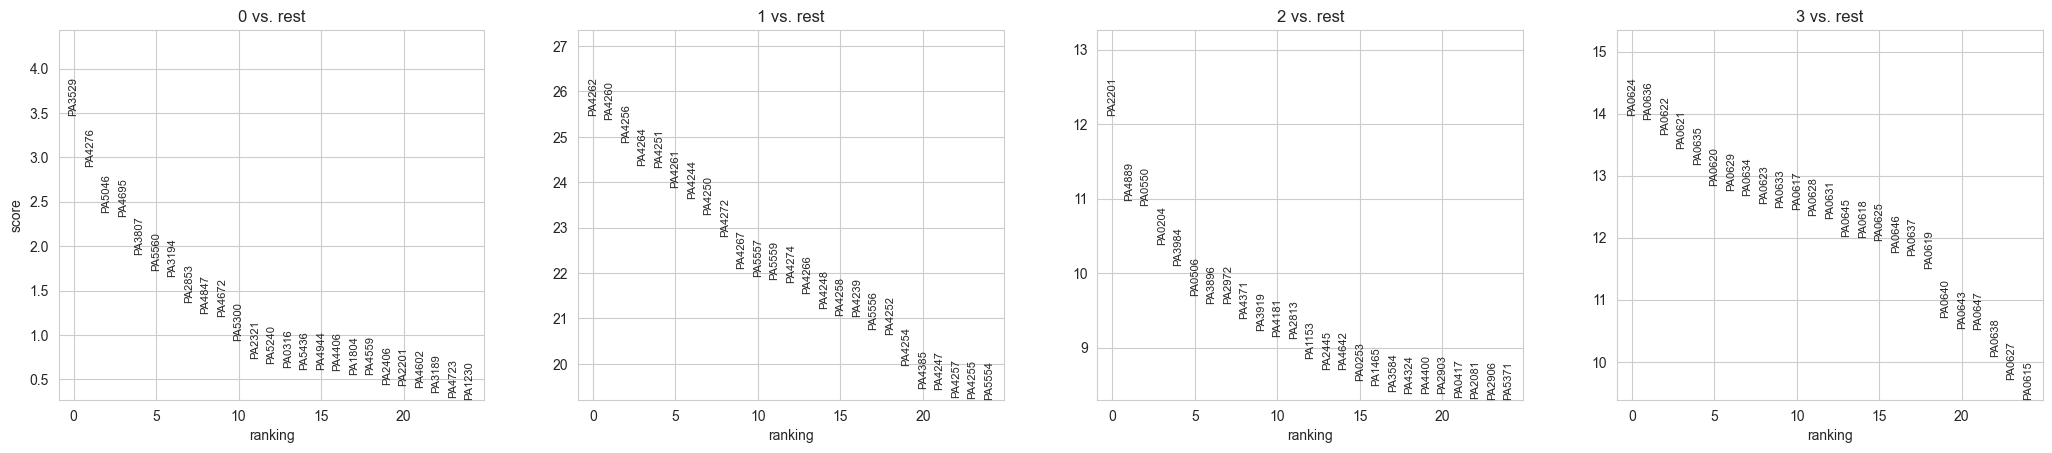

In [5]:
sc.tl.rank_genes_groups(data_gene, 'leiden_opt', method='wilcoxon')
sc.pl.rank_genes_groups(data_gene, n_genes=25, sharey=False)

## Generate synthetic null data for ClusterDE

### Estimate distribution and parameters for every gene

In [6]:
importlib.reload(nb)
import warnings
warnings.filterwarnings("ignore")
nb.estimate_overdisp_nb(data_gene, layer="counts", flavor="statsmod_auto")


gene 0
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
Both NB and ZINB not converged! Using NB without starting params
gene 100
Both NB a

## Find optimal correlation matrix scaling and generate synthetic null data

In [7]:
importlib.reload(cd)
xmin, fval, R_est_noscale = cd.select_covariance_scaling(data_gene, cor_cutoff=0.1, min_scale=1, max_scale=2, maxiter=20, rng_seed=1234)
print(xmin)

KeyboardInterrupt: 

In [8]:
importlib.reload(cd)

data_gen_noscale, R_est_noscale = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True, corr_factor=1,
                                                  R_est=None, check_pd=True)


xmin = 1.2360679772046799

# Generate scaling matrix
cor_orig = cd.schaefer_strimmer(data_gene.layers["counts"].toarray(), use_corr=True)
factor_cor = (np.abs(cor_orig) > 0.1)
cf = factor_cor * xmin
cf[cf == 0] = 1
np.fill_diagonal(cf, 1)


In [9]:
importlib.reload(cd)
data_null_gen, R_est = cd.generate_nb_data_copula(data_gene, rng_seed=5678, nb_flavor="statsmod_auto",
                                                  auto_dist=True, correct_var=True, return_R=True,
                                                  corr_factor=cf, R_est=R_est_noscale, check_pd=False, min_nonzero=2)

In [10]:
data_null_gen.var_names

Index(['PA0001', 'PA0002', 'PA0003', 'PA0004', 'PA0005', 'PA0006', 'PA0007',
       'PA0008', 'PA0009', 'PA0010',
       ...
       'PA5561', 'PA5562', 'PA5563', 'PA5564', 'PA5565', 'PA5566', 'PA5567',
       'PA5568', 'PA5569', 'PA5570'],
      dtype='object', name='PAO1_ID', length=5546)

In [11]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [12]:
data_null_gen.var

,var_counts,mean_counts
PAO1_ID,,
PA0001,0.886218,0.712435
PA0002,0.732586,0.523964
PA0003,1.197131,0.913212
PA0004,0.465569,0.400907
PA0005,0.141982,0.141192
...,...,...
PA5566,0.013450,0.012306
PA5567,0.197106,0.147668
PA5568,0.703791,0.642487


In [13]:
data_gene_nonzero = data_gene[:, data_null_gen.var_names].copy()

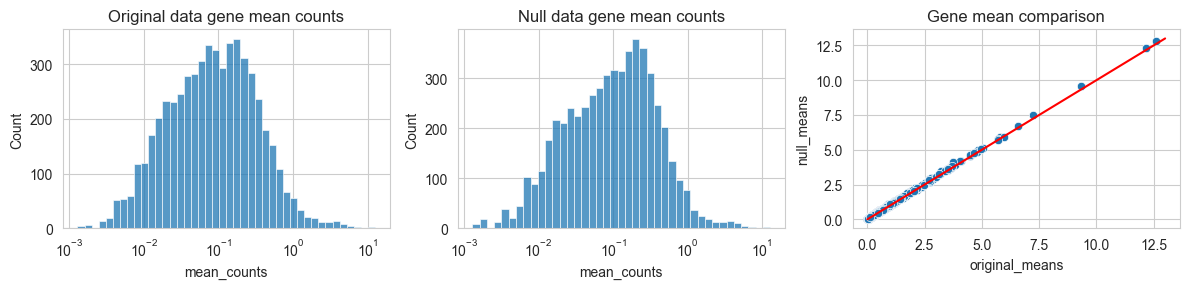

SignificanceResult(statistic=0.9968233661273043, pvalue=0.0)


In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="mean_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene mean counts")
sns.histplot(data_null_gen.var, x="mean_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene mean counts")

mean_df_opt = pd.DataFrame({"original_means": data_gene_nonzero.var["mean_counts"], "null_means": data_null_gen.var["mean_counts"]})
sns.scatterplot(mean_df_opt, y="null_means", x="original_means", ax=ax[2])
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["mean_counts"]))], color="red")
ax[2].set_title("Gene mean comparison")
plt.tight_layout()
plt.show()

print(spearmanr(mean_df_opt["original_means"], mean_df_opt["null_means"]))

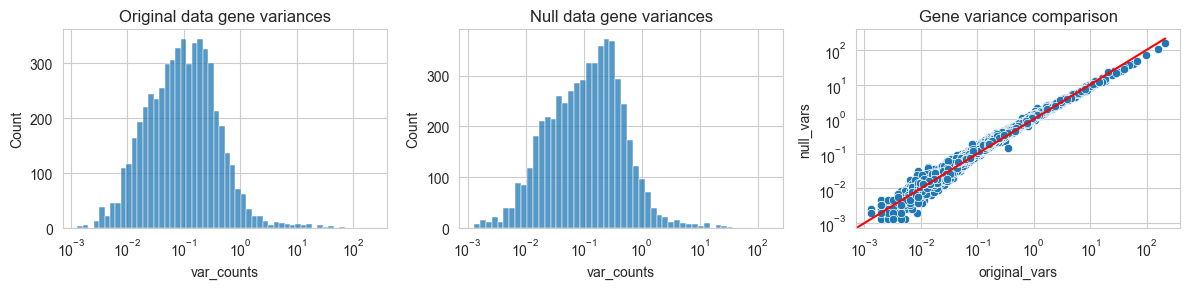

SignificanceResult(statistic=0.9946144943316074, pvalue=0.0)
[[1.         0.99531564]
 [0.99531564 1.        ]]


In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
sns.histplot(data_gene_nonzero.var, x="var_counts", ax=ax[0], log_scale=True)
ax[0].set_title("Original data gene variances")
sns.histplot(data_null_gen.var, x="var_counts", ax=ax[1], log_scale=True)
ax[1].set_title("Null data gene variances")

var_df_opt = pd.DataFrame({"original_vars": data_gene_nonzero.var["var_counts"], "null_vars": data_null_gen.var["var_counts"]})
var_df_opt["ratio"] = var_df_opt["null_vars"] / var_df_opt["original_vars"]
var_df_opt["diff"] = var_df_opt["null_vars"] - var_df_opt["original_vars"]

g = sns.scatterplot(var_df_opt, y="null_vars", x="original_vars", ax=ax[2])

g.set(xscale="log", yscale="log")
ax[2].plot([0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], [0, np.ceil(np.max(data_gene_nonzero.var["var_counts"]))], color="red")
ax[2].set_title("Gene variance comparison")
plt.tight_layout()
plt.show()

print(spearmanr(var_df_opt["original_vars"], var_df_opt["null_vars"]))
print(np.corrcoef(var_df_opt["original_vars"], var_df_opt["null_vars"]))

### Process null data

In [16]:
sc.pp.calculate_qc_metrics(data_null_gen)
data_null_gen.var["var_counts"] = np.asarray(np.var(data_null_gen.X, axis=0)).squeeze()
data_null_gen.var["mean_counts"] = np.asarray(np.mean(data_null_gen.X, axis=0)).squeeze()

In [17]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_null_gen, flavor="sctransform")
data_null_gen.layers["counts"] = data_null_gen.X.copy()

k_opt = 3
n_neighbors_opt = 50
min_dist_opt = 0.3
res_opt = 0.15

sc.pp.calculate_qc_metrics(data_null_gen, var_type="genes", percent_top=None, log1p=True, inplace=True)
sc.pp.normalize_total(data_null_gen, target_sum=None, layer=None)
data_null_gen.X = sps.csr_matrix(np.log(data_null_gen.X + np.array(data_null_gen.var["nb_overdisp"] / 4)))
data_null_gen.layers["vst_counts"] = data_null_gen.X.copy()
sc.pp.scale(data_null_gen, max_value=10, zero_center=True)
data_null_gen.X[np.isnan(data_null_gen.X)] = 0
sc.tl.pca(data_null_gen, svd_solver='arpack')
sc.pp.neighbors(data_null_gen, n_neighbors=n_neighbors_opt, n_pcs=k_opt)
sc.tl.umap(data_null_gen, neighbors_key="neighbors", min_dist=min_dist_opt, spread=1)


Index(['Intercept_sct', 'log_umi_sct', 'theta_sct', 'is_scd_outlier_sct',
       'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct',
       'genes_step1_sct', 'log10_gmean_sct', 'is_scd_outlier'],
      dtype='object')


In [18]:
data_null_gen.var

,var_counts,mean_counts,is_scd_outlier,nb_overdisp,nb_overdisp_cutoff,nb_mean,nb_umi,Intercept_step1_sct,log_umi_step1_sct,dispersion_step1_sct,n_cells_by_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mean,std
PAO1_ID,,,,,,,,,,,,,,,,,
PA0001,0.886218,0.712435,False,6.168704,6.168704,-8.534788,2.636814,-8.925563,2.754419,0.017341,729,0.537916,52.784974,1100.0,7.003974,0.705046,0.331665
PA0002,0.732586,0.523964,False,4.452463,4.452463,-8.479308,2.510505,-9.430368,2.816549,0.046622,555,0.421315,64.054404,809.0,6.697034,0.359428,0.377252
PA0003,1.197131,0.913212,False,6.651865,6.651865,-8.478799,2.697069,NaN,NaN,NaN,832,0.648784,46.113990,1410.0,7.252054,0.828631,0.342769
PA0004,0.465569,0.400907,False,3.300785,3.300785,-8.352816,2.395943,-9.917083,2.885378,0.018295,478,0.337120,69.041451,619.0,6.429719,0.055107,0.405999
PA0005,0.141982,0.141192,False,0.882145,0.882145,-7.130220,1.682797,NaN,NaN,NaN,203,0.132073,86.852332,218.0,5.389072,-1.293401,0.581859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA5566,0.013450,0.012306,False,0.101246,0.101246,-5.553185,0.368519,-6.783261,0.776778,0.027348,18,0.012231,98.834197,19.0,2.995732,-3.633602,0.401644
PA5567,0.197106,0.147668,False,0.862057,0.862057,-7.097171,1.664879,-7.806692,1.902440,0.083684,180,0.137732,88.341969,228.0,5.433722,-1.330240,0.583728
PA5568,0.703791,0.642487,False,5.807612,5.807612,-8.539576,2.611428,-7.611846,2.307249,0.013207,700,0.496212,54.663212,992.0,6.900731,0.644024,0.341834


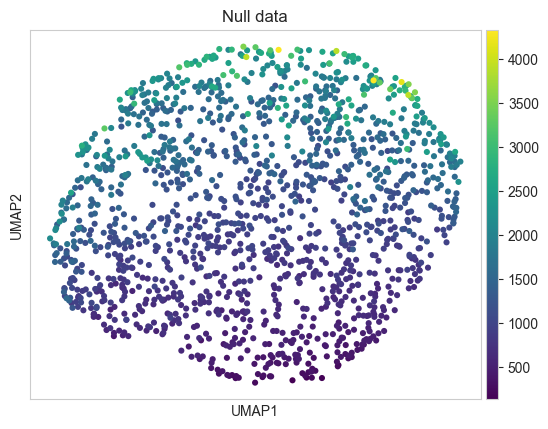

In [19]:
sc.pl.umap(data_null_gen, color="total_counts", alpha=1, cmap="viridis", title="Null data")
plt.show()


In [128]:
res2 = 0.01
twoclust = False
#345 vs. 456

while twoclust is False:
    if (res2 * 100)%5 == 0:
        print(res2)
    res2 += 0.005
    res2 = np.round(res2, 3)
    sc.tl.leiden(data_null_gen, resolution=res2, key_added="leiden", random_state=345)
    nclust = len(data_null_gen.obs["leiden"].unique())
    if nclust == 2:
        twoclust = True
    
    
print(f"Resolution for two clusters: {res2}")

0.05
0.1
Resolution for two clusters: 0.11


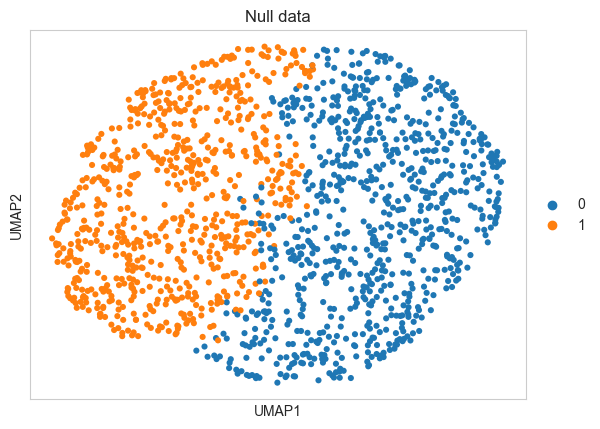

In [129]:
sc.pl.umap(data_null_gen, color="leiden", alpha=1, cmap="viridis", title="Null data")
plt.show()

In [130]:
# data_null_gen.write("../../data/MOBA_scRNAseq/outs_S3/S3_null_data_opt.h5ad")


In [131]:
X_null_gen_0 = data_null_gen.X[data_null_gen.obs["leiden"] == "0"]
X_null_gen_1 = data_null_gen.X[data_null_gen.obs["leiden"] != "0"]

pval_null_gen = pd.DataFrame({"pval_null": ranksums(X_null_gen_0, X_null_gen_1, alternative="two-sided").pvalue}, index=data_null_gen.var.index)

clusters = data_gene.obs["leiden_opt"].unique()

In [132]:
importlib.reload(cd)
DEs_log_gen = {}
pvals_log_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=True)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_log_gen[c] = DE_TU
    pvals_log_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_log_gen[c])}; Minimum q value: {np.min(pvals_log_gen[c]['q'])}")

Cluster 0 - DE genes: 0; Minimum q value: 0.12966899483753416
Cluster 1 - DE genes: 0; Minimum q value: 0.08333333333333333
Cluster 2 - DE genes: 0; Minimum q value: 0.05421686746987952
Cluster 3 - DE genes: 0; Minimum q value: 1.0


In [133]:
DEs_gen = {}
pvals_gen = {}
fdr = 0.05

for c in clusters:
    X_data_0 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] == c].copy()
    X_data_1 = data_gene_nonzero.X[data_gene_nonzero.obs["leiden_opt"] != c].copy()
    p_data = pd.DataFrame({"pval_data": ranksums(X_data_0, X_data_1, alternative="two-sided").pvalue}, index=data_gene_nonzero.var.index)
    DE_TU, pval_TU = cd.call_de(p_data, pval_null_gen, FDR=fdr, correct=False, nlog=False)
    data_gene_nonzero.var[f"pval_cluster_{c}_gen"] = pval_TU["pval_data"]
    data_gene_nonzero.var[f"q_cluster_{c}_gen"] = pval_TU["q"]
    data_gene_nonzero.var[f"DE_cluster_{c}_gen"] = (data_gene_nonzero.var[f"q_cluster_{c}_gen"] < fdr)
    
    DEs_gen[c] = DE_TU
    pvals_gen[c] = pval_TU
    print(f"Cluster {c} - DE genes: {len(DEs_gen[c])}; Minimum q value: {np.min(pvals_gen[c]['q'])}")

Cluster 0 - DE genes: 2788; Minimum q value: 0.025945945945945945
Cluster 1 - DE genes: 0; Minimum q value: 0.09090909090909091
Cluster 2 - DE genes: 4923; Minimum q value: 0.006802721088435374
Cluster 3 - DE genes: 0; Minimum q value: 1.0


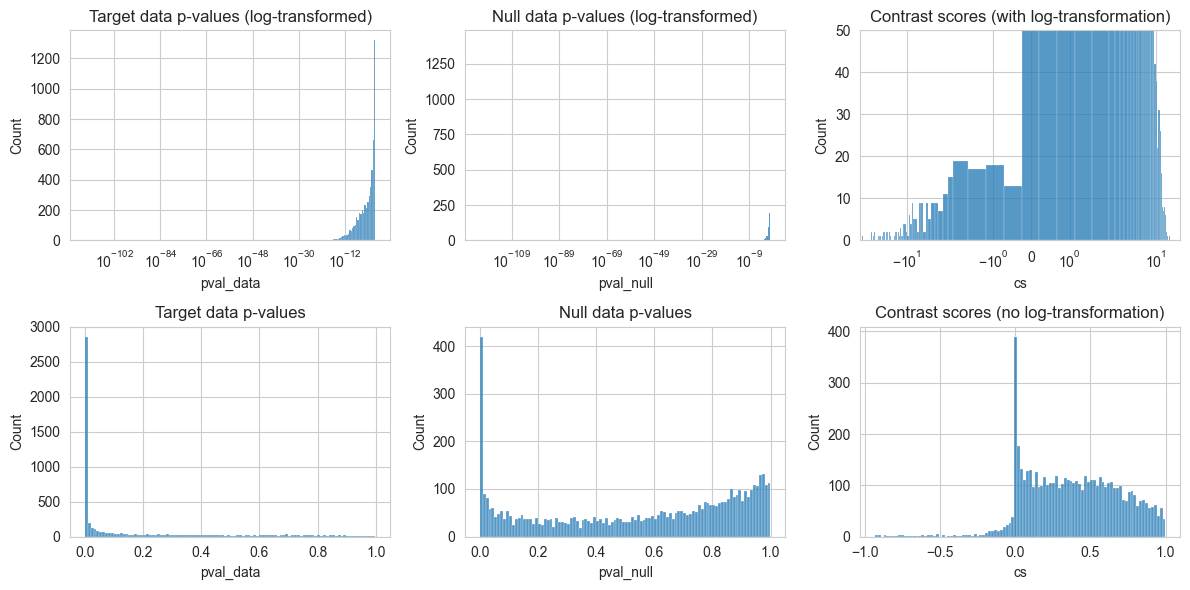

In [134]:
c = "2"

fig, ax = plt.subplots(2, 3, figsize=(12,6))
sns.histplot(pvals_log_gen[c], x="pval_data", ax=ax[0,0], log_scale=True)
ax[0,0].set_title("Target data p-values (log-transformed)")
sns.histplot(pvals_log_gen[c], x="pval_null", ax=ax[0,1], log_scale=True)
ax[0,1].set_title("Null data p-values (log-transformed)")

sns.histplot(pvals_log_gen[c], x="cs", ax=ax[0,2])
ax[0,2].set_title("Contrast scores (with log-transformation)")
ax[0,2].set(xscale="symlog", ylim=(0, 50))

sns.histplot(pvals_gen[c], x="pval_data", ax=ax[1,0], bins=100)
ax[1,0].set_title("Target data p-values")
sns.histplot(pvals_gen[c], x="pval_null", ax=ax[1,1], bins=100)
ax[1,1].set_title("Null data p-values")

sns.histplot(pvals_gen[c], x="cs", ax=ax[1,2], bins=100)
ax[1,2].set_title("Contrast scores (no log-transformation)")


plt.tight_layout()
plt.show()

In [135]:
for c in clusters:
    print(f"cluster {c}")
    print(pvals_log_gen[c]["q"].value_counts().sort_index())
    print("")

cluster 0
q
0.129669    3293
0.129697       7
0.129764       6
0.129909       4
0.130133       2
            ... 
0.206190       8
0.206799       1
0.206882       3
0.207182       3
1.000000     951
Name: count, Length: 288, dtype: int64

cluster 1
q
0.083333      12
0.369190    1494
0.369352      21
0.370013      27
0.371101      17
            ... 
0.517421       6
0.517553       1
0.517676       3
0.518630       1
1.000000    1896
Name: count, Length: 371, dtype: int64

cluster 2
q
0.054217    4814
0.054368       5
0.054741      22
0.054891       5
0.055074       2
            ... 
0.075204       2
0.075369       2
0.075490       5
0.075849       2
1.000000     391
Name: count, Length: 92, dtype: int64

cluster 3
q
1.0    5546
Name: count, dtype: int64


In [136]:
pvals_log_gen["1"]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
PAO1_ID,,,,,,
PA4244,1.816292e-123,8.022979e-77,122.740814,76.095664,46.645150,0.083333
PA4251,1.283188e-130,3.699241e-100,129.891710,99.431887,30.459822,0.083333
PA4261,5.770388e-126,5.015170e-101,125.238795,100.299714,24.939081,0.083333
PA4260,6.089935e-142,2.056065e-117,141.215387,116.686963,24.528424,0.083333
PA4272,5.684891e-115,1.240137e-90,114.245278,89.906530,24.338748,0.083333
...,...,...,...,...,...,...
PA1583,8.929773e-34,8.308059e-46,33.049160,45.080500,-12.031341,1.000000
PA4669,6.033705e-37,3.268569e-50,36.219416,49.485642,-13.266226,1.000000
PA4259,1.374736e-63,6.918863e-77,62.861781,76.159965,-13.298184,1.000000


In [137]:
pvals_log_gen["0"]

,pval_data,pval_null,pval_trafo_data,pval_trafo_null,cs,q
PAO1_ID,,,,,,
PA5315,1.530448e-13,1.347589e-01,12.815181,0.870443,11.944739,0.129669
PA1271,1.972031e-12,8.811482e-01,11.705086,0.054951,11.650135,0.129669
PA0649,1.425764e-10,9.119416e-01,9.845952,0.040033,9.805919,0.129669
PA3161,2.110355e-10,8.181847e-01,9.675644,0.087149,9.588496,0.129669
PA3011,3.503805e-10,9.632472e-01,9.455460,0.016262,9.439198,0.129669
...,...,...,...,...,...,...
PA4267,8.903143e-03,3.494432e-113,2.050457,112.456623,-110.406167,1.000000
PA4256,2.996901e-04,1.999879e-115,3.523328,114.698996,-111.175669,1.000000
PA4260,2.674890e-05,2.056065e-117,4.572694,116.686963,-112.114269,1.000000


['PA4264', 'PA4260', 'PA4262', 'PA4256', 'PA4251', 'PA4267', 'PA4252', 'PA4274', 'PA4250', 'PA5556']


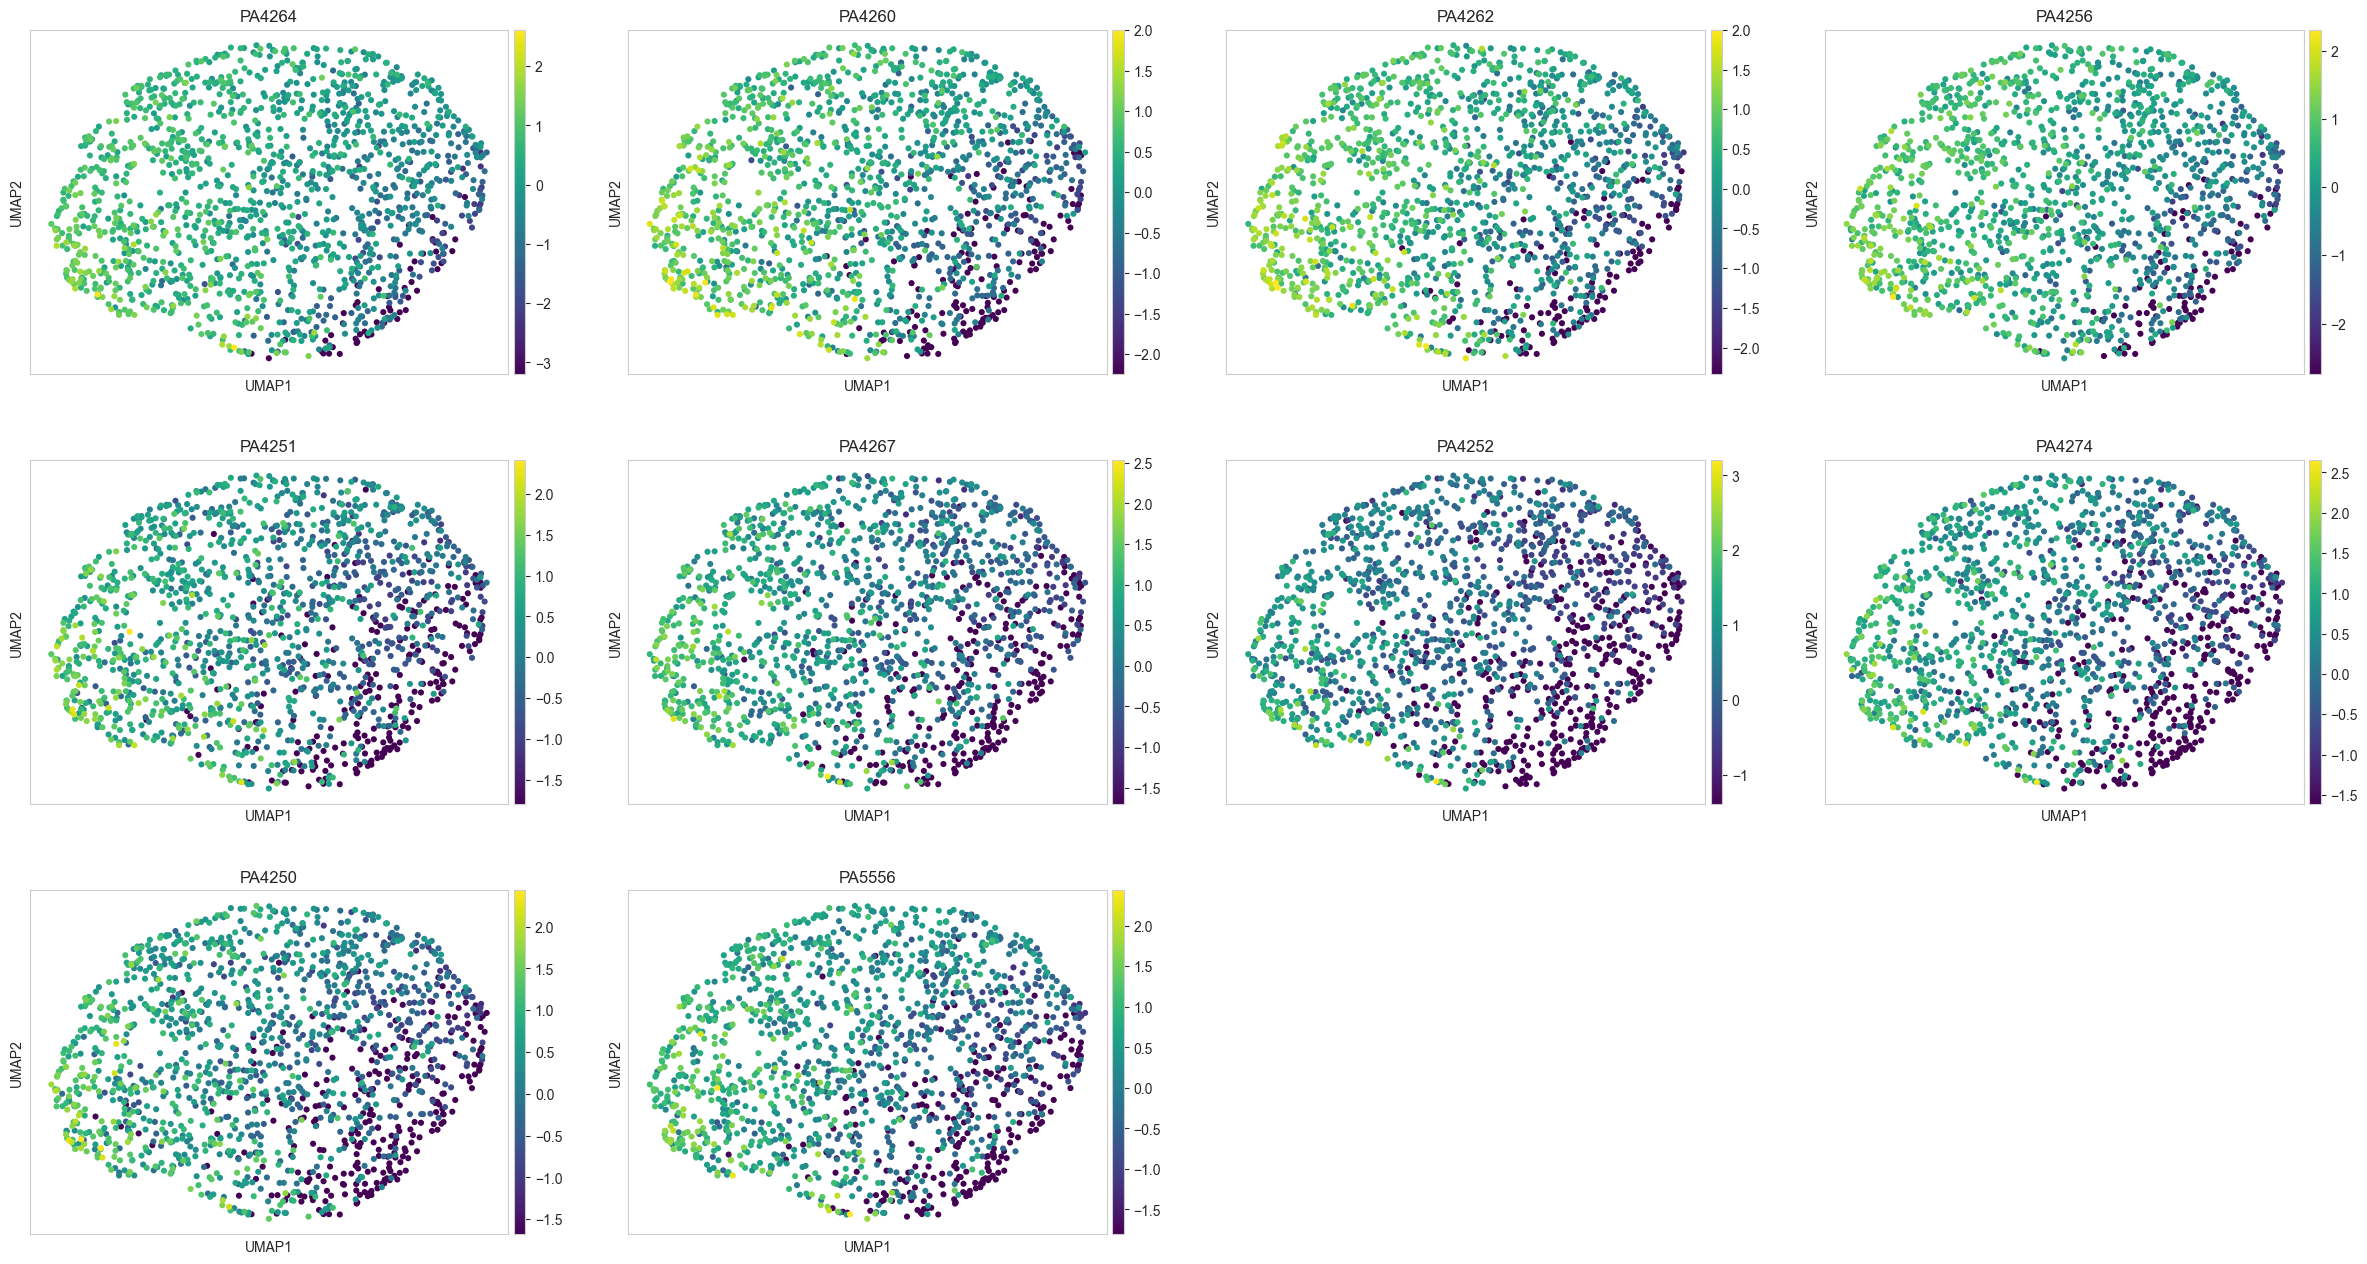

In [78]:
# goi = pvals_log_gen["3"].sort_values("pval_null", ascending=True).index[:10]
goi = ['PA4264', 'PA4260', 'PA4262', 'PA4256', 'PA4251', 'PA4267', 'PA4252',
       'PA4274', 'PA4250', 'PA5556']
print(goi)

sc.pl.umap(data_null_gen, color=goi, cmap="viridis")

## Testing...

In [30]:
importlib.reload(nb)
nb.estimate_overdisp_nb(data_gene, flavor="sctransform", layer="counts")


Index(['Intercept_sct', 'log_umi_sct', 'theta_sct', 'is_scd_outlier_sct',
       'Intercept_step1_sct', 'log_umi_step1_sct', 'dispersion_step1_sct',
       'genes_step1_sct', 'log10_gmean_sct', 'is_scd_outlier'],
      dtype='object')


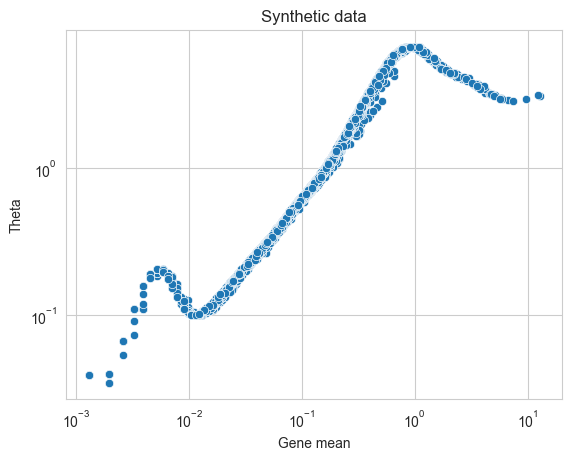

In [31]:
g = sns.scatterplot(data=data_null_gen.var, y="nb_overdisp_cutoff", x="mean_counts")
g.set(xscale="log", yscale="log")
plt.title("Synthetic data")
plt.xlabel("Gene mean")
plt.ylabel("Theta")
plt.show()

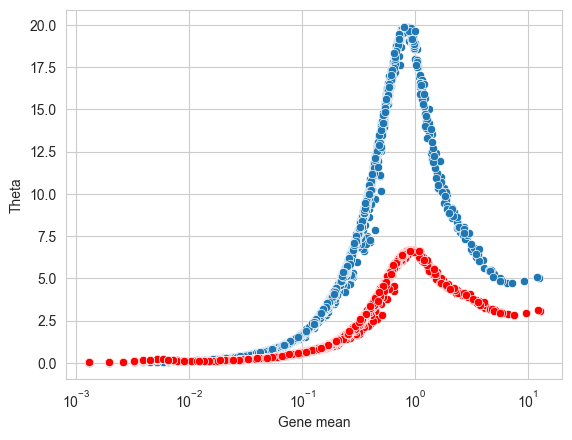

In [32]:
g = sns.scatterplot(data=data_gene.var, y="nb_overdisp_cutoff", x="mean_counts")
sns.scatterplot(data=data_null_gen.var, y="nb_overdisp_cutoff", x="mean_counts", color="red")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("Theta")
plt.show()

In [53]:
nb_est_df_null = data_null_gen.var.reset_index()[["nb_mean", "nb_overdisp", "nb_overdisp_cutoff", "mean_counts", "var_counts", "n_cells_by_counts", "PAO1_ID", "nb_umi", "Intercept_step1_sct", "log_umi_step1_sct", "dispersion_step1_sct", "total_counts"]]
nb_est_df_null["type"] = "null"
nb_est_df_gene = data_gene.var[["nb_mean", "nb_overdisp", "nb_overdisp_cutoff", "mean_counts", "var_counts", "n_cells_by_counts", "PAO1_ID", "nb_umi", "Intercept_step1_sct", "log_umi_step1_sct", "dispersion_step1_sct", "total_counts"]]
nb_est_df_gene["type"] = "real"

nb_est_df = pd.concat([nb_est_df_null, nb_est_df_gene])
nb_est_df

,nb_mean,nb_overdisp,nb_overdisp_cutoff,mean_counts,var_counts,n_cells_by_counts,PAO1_ID,nb_umi,Intercept_step1_sct,log_umi_step1_sct,dispersion_step1_sct,total_counts,type
0,-8.534788,6.168704,6.168704,0.712435,0.886218,729,PA0001,2.636814,-8.925563,2.754419,0.017341,1100.0,null
1,-8.479308,4.452463,4.452463,0.523964,0.732586,555,PA0002,2.510505,-9.430368,2.816549,0.046622,809.0,null
2,-8.478799,6.651865,6.651865,0.913212,1.197131,832,PA0003,2.697069,NaN,NaN,NaN,1410.0,null
3,-8.352816,3.300785,3.300785,0.400907,0.465569,478,PA0004,2.395943,-9.917083,2.885378,0.018295,619.0,null
4,-7.130220,0.882145,0.882145,0.141192,0.141982,203,PA0005,1.682797,NaN,NaN,NaN,218.0,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA5566,-11.909152,0.114507,0.114507,0.009715,0.010916,14,PA5566,2.353771,-7.586299,0.980230,0.034549,15.0,real
PA5567,-9.794967,2.285935,2.285935,0.126943,0.161347,163,PA5567,2.502667,-9.934617,2.556388,0.029657,196.0,real
PA5568,-7.085377,18.322180,18.322180,0.659974,0.750315,740,PA5568,2.183642,NaN,NaN,NaN,1019.0,real
PA5569,-5.555596,6.463974,6.463974,3.498057,14.170981,1430,PA5569,2.223996,-6.188664,2.421585,0.057214,5401.0,real


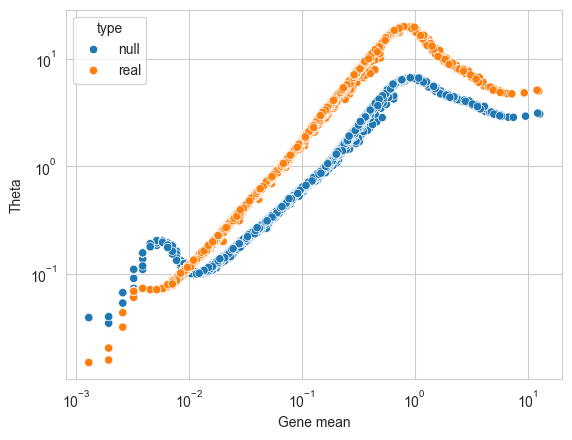

In [54]:
g = sns.scatterplot(data=nb_est_df, y="nb_overdisp_cutoff", x="mean_counts", hue="type")
g.set(xscale="log", yscale="log")
plt.xlabel("Gene mean")
plt.ylabel("Theta")
plt.show()

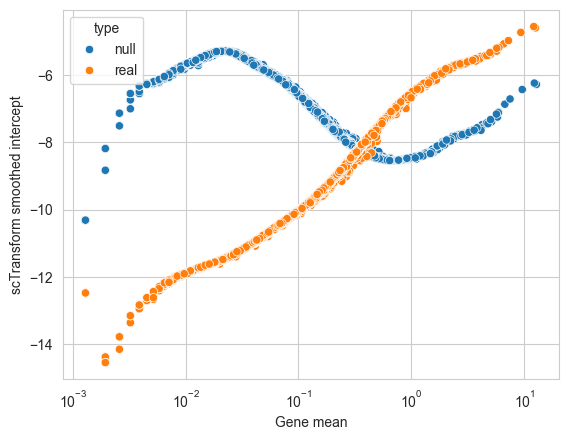

In [55]:
g = sns.scatterplot(data=nb_est_df, y="nb_mean", x="mean_counts", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform smoothed intercept")
plt.show()

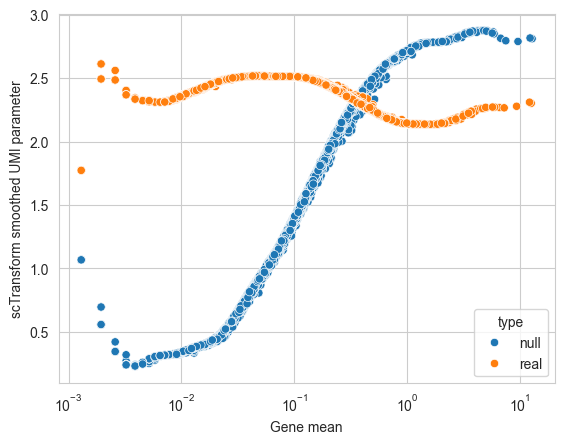

In [56]:
g = sns.scatterplot(data=nb_est_df, y="nb_umi", x="mean_counts", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform smoothed UMI parameter")
plt.show()

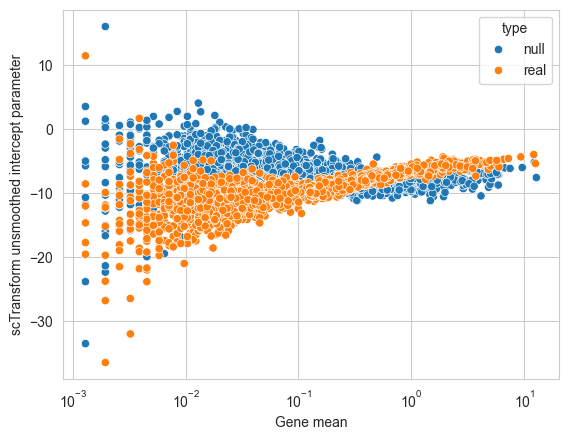

In [57]:
g = sns.scatterplot(data=nb_est_df, y="Intercept_step1_sct", x="mean_counts", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform unsmoothed intercept parameter")
plt.show()

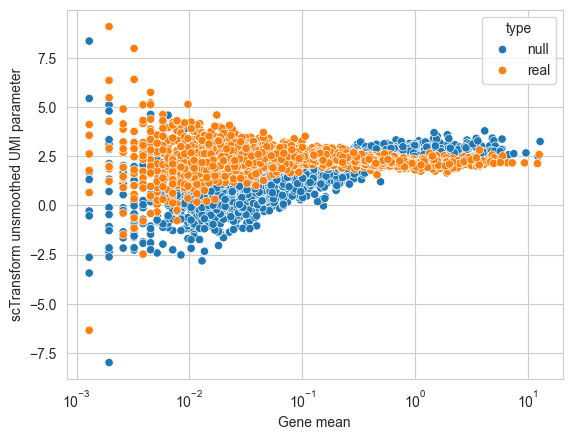

In [58]:
g = sns.scatterplot(data=nb_est_df, y="log_umi_step1_sct", x="mean_counts", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform unsmoothed UMI parameter")
plt.show()

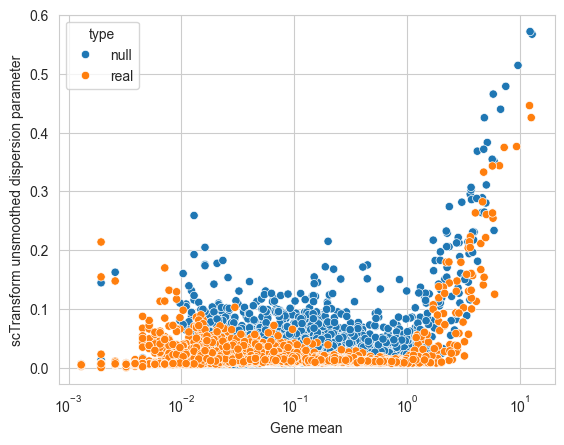

In [59]:
g = sns.scatterplot(data=nb_est_df, y="dispersion_step1_sct", x="mean_counts", hue="type")
g.set(xscale="log")
plt.xlabel("Gene mean")
plt.ylabel("scTransform unsmoothed dispersion parameter")
plt.show()

In [60]:
nb_est_df_paired = nb_est_df.pivot(index="PAO1_ID", columns="type")
nb_est_df_paired.columns = ['_'.join(col).strip() for col in nb_est_df_paired.columns.values]
nb_est_df_paired

,nb_mean_null,nb_mean_real,nb_overdisp_null,nb_overdisp_real,nb_overdisp_cutoff_null,nb_overdisp_cutoff_real,mean_counts_null,mean_counts_real,var_counts_null,var_counts_real,...,nb_umi_null,nb_umi_real,Intercept_step1_sct_null,Intercept_step1_sct_real,log_umi_step1_sct_null,log_umi_step1_sct_real,dispersion_step1_sct_null,dispersion_step1_sct_real,total_counts_null,total_counts_real
PAO1_ID,,,,,,,,,,,,,,,,,,,,,
PA0001,-8.534788,-7.078398,6.168704,18.381380,6.168704,18.381380,0.712435,0.666451,0.886218,0.755973,...,2.636814,2.182879,-8.925563,-6.941972,2.754419,2.135988,0.017341,0.009296,1100.0,1029.0
PA0002,-8.479308,-7.687153,4.452463,12.470362,4.452463,12.470362,0.523964,0.468912,0.732586,0.588412,...,2.510505,2.255502,-9.430368,-7.928057,2.816549,2.336558,0.046622,0.012938,809.0,724.0
PA0003,-8.478799,-6.658154,6.651865,19.568203,6.651865,19.568203,0.913212,0.893782,1.197131,1.043122,...,2.697069,2.145825,NaN,-6.444100,NaN,2.071128,NaN,0.008896,1410.0,1380.0
PA0004,-8.352816,-8.034767,3.300785,9.652224,3.300785,9.652224,0.400907,0.373705,0.465569,0.398557,...,2.395943,2.300569,-9.917083,NaN,2.885378,NaN,0.018295,NaN,619.0,577.0
PA0005,-7.130220,-9.801467,0.882145,2.269367,0.882145,2.269367,0.141192,0.120466,0.141982,0.124089,...,1.682797,2.503061,NaN,NaN,NaN,NaN,NaN,NaN,218.0,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA5566,-5.553185,-11.909152,0.101246,0.114507,0.101246,0.114507,0.012306,0.009715,0.013450,0.010916,...,0.368519,2.353771,-6.783261,-7.586299,0.776778,0.980230,0.027348,0.034549,19.0,15.0
PA5567,-7.097171,-9.794967,0.862057,2.285935,0.862057,2.285935,0.147668,0.126943,0.197106,0.161347,...,1.664879,2.502667,-7.806692,-9.934617,1.902440,2.556388,0.083684,0.029657,228.0,196.0
PA5568,-8.539576,-7.085377,5.807612,18.322180,5.807612,18.322180,0.642487,0.659974,0.703791,0.750315,...,2.611428,2.183642,-7.611846,NaN,2.307249,NaN,0.013207,NaN,992.0,1019.0


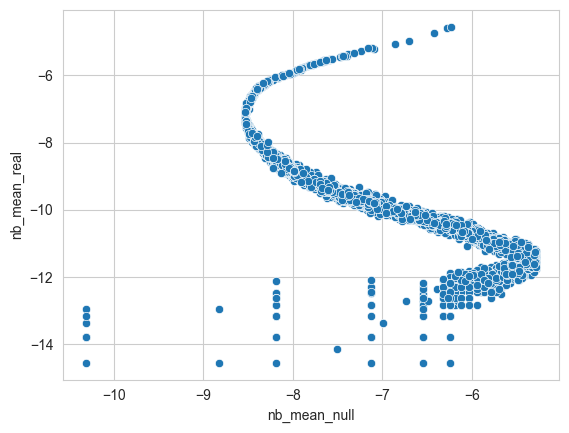

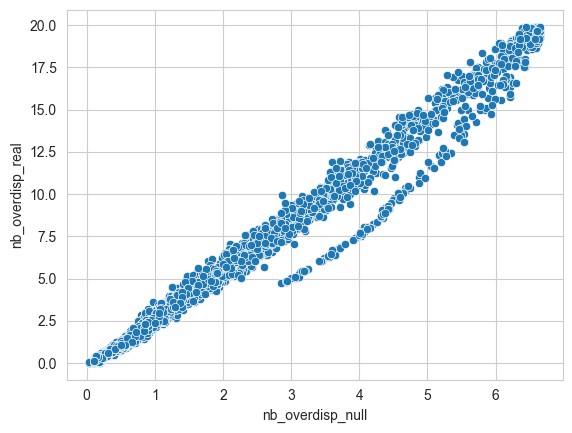

In [61]:
sns.scatterplot(nb_est_df_paired, x="nb_mean_null", y="nb_mean_real")
plt.show()

sns.scatterplot(nb_est_df_paired, x="nb_overdisp_null", y="nb_overdisp_real")
plt.show()

In [65]:
nb_est_df_paired["total_counts"] = nb_est_df["total_counts"]
nb_est_df_paired["nb_est_real"] = nb_est_df_paired["Intercept_step1_sct_real"] + nb_est_df_paired["log_umi_step1_sct_real"] * np.log10(nb_est_df_paired["total_counts"])
nb_est_df_paired["nb_est_null"] = nb_est_df_paired["Intercept_step1_sct_null"] + nb_est_df_paired["log_umi_step1_sct_null"] * np.log10(nb_est_df_paired["total_counts"])

nb_est_df_paired["nb_est_real_smoothed"] = nb_est_df_paired["nb_mean_real"] + nb_est_df_paired["nb_umi_real"] * np.log10(nb_est_df_paired["total_counts"])
nb_est_df_paired["nb_est_null_smoothed"] = nb_est_df_paired["nb_mean_null"] + nb_est_df_paired["nb_umi_null"] * np.log10(nb_est_df_paired["total_counts"])

nb_est_df_paired

,nb_mean_null,nb_mean_real,nb_overdisp_null,nb_overdisp_real,nb_overdisp_cutoff_null,nb_overdisp_cutoff_real,mean_counts_null,mean_counts_real,var_counts_null,var_counts_real,...,dispersion_step1_sct_null,dispersion_step1_sct_real,total_counts_null,total_counts_real,gene_mean,total_counts,nb_est_real,nb_est_null,nb_est_real_smoothed,nb_est_null_smoothed
PAO1_ID,,,,,,,,,,,,,,,,,,,,,
PA0001,-8.534788,-7.078398,6.168704,18.381380,6.168704,18.381380,0.712435,0.666451,0.886218,0.755973,...,0.017341,0.009296,1100.0,1029.0,0.666451,1029.0,-0.507489,-0.628110,-0.502660,-0.591608
PA0002,-8.479308,-7.687153,4.452463,12.470362,4.452463,12.470362,0.523964,0.468912,0.732586,0.588412,...,0.046622,0.012938,809.0,724.0,0.468912,724.0,-1.246113,-1.375775,-1.237007,-1.299921
PA0003,-8.478799,-6.658154,6.651865,19.568203,6.651865,19.568203,0.913212,0.893782,1.197131,1.043122,...,NaN,0.008896,1410.0,1380.0,0.893782,1380.0,0.058992,NaN,0.079477,-0.010328
PA0004,-8.352816,-8.034767,3.300785,9.652224,3.300785,9.652224,0.400907,0.373705,0.465569,0.398557,...,0.018295,NaN,619.0,577.0,0.373705,577.0,NaN,-1.950045,-1.682491,-1.737195
PA0005,-7.130220,-9.801467,0.882145,2.269367,0.882145,2.269367,0.141192,0.120466,0.141982,0.124089,...,NaN,NaN,218.0,186.0,0.120466,186.0,NaN,NaN,-4.120738,-3.311091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA5566,-5.553185,-11.909152,0.101246,0.114507,0.101246,0.114507,0.012306,0.009715,0.013450,0.010916,...,0.027348,0.034549,19.0,15.0,0.009715,15.0,-6.433459,-5.869699,-9.140902,-5.119773
PA5567,-7.097171,-9.794967,0.862057,2.285935,0.862057,2.285935,0.147668,0.126943,0.197106,0.161347,...,0.083684,0.029657,228.0,196.0,0.126943,196.0,-4.074722,-3.445811,-4.058213,-3.280842
PA5568,-8.539576,-7.085377,5.807612,18.322180,5.807612,18.322180,0.642487,0.659974,0.703791,0.750315,...,0.013207,NaN,992.0,1019.0,0.659974,1019.0,NaN,-0.671240,-0.516603,-0.683946


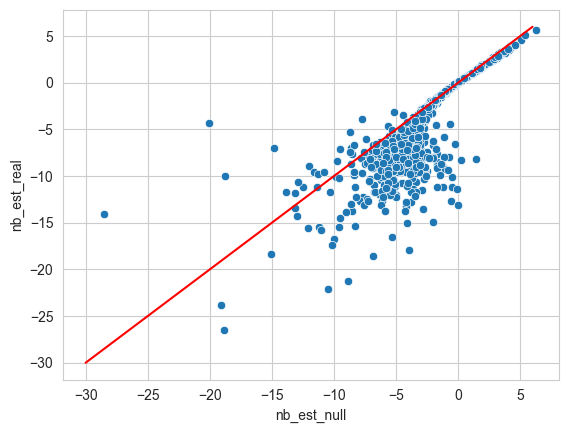

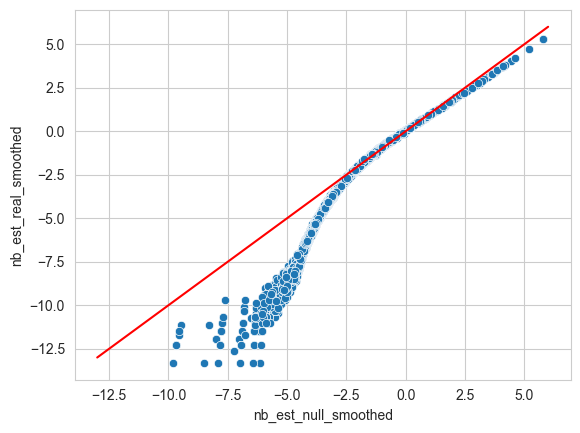

In [68]:
g = sns.scatterplot(nb_est_df_paired, x="nb_est_null", y="nb_est_real")
g.plot([-30, 6], [-30, 6], color="red")

plt.show()

g = sns.scatterplot(nb_est_df_paired, x="nb_est_null_smoothed", y="nb_est_real_smoothed")
g.plot([-13, 6], [-13, 6], color="red")
plt.show()

In [43]:
data_null_gen.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden
AAACCCAGTGGACCTC-1,1259,7.138867,2650.0,7.882692,0
AAACCCATCCTGTAGA-1,1493,7.309212,2947.0,7.988882,1
AAACGCTCAGATTTCG-1,526,6.267201,911.0,6.815640,0
AAACGCTTCTTTGCTA-1,545,6.302619,797.0,6.682109,0
AAAGAACCAGTCTGGC-1,932,6.838405,1450.0,7.280008,0
...,...,...,...,...,...
TTTGATCTCCTCGCAT-1,1014,6.922644,1744.0,7.464510,0
TTTGGAGCACCGAATT-1,709,6.565265,918.0,6.823286,1
TTTGGAGCAGCAGTTT-1,443,6.095825,542.0,6.297109,1
TTTGGTTTCGTTGTGA-1,865,6.763885,1406.0,7.249215,0


In [44]:
cell_df_null = data_null_gen.obs.reset_index()[["total_counts", "n_genes_by_counts"]]
cell_df_null["type"] = "null"
cell_df_gene = data_gene.obs[["total_counts", "n_genes_by_counts"]]
cell_df_gene["type"] = "real"

cell_df = pd.concat([cell_df_gene, cell_df_null])

<Axes: xlabel='total_counts', ylabel='Count'>

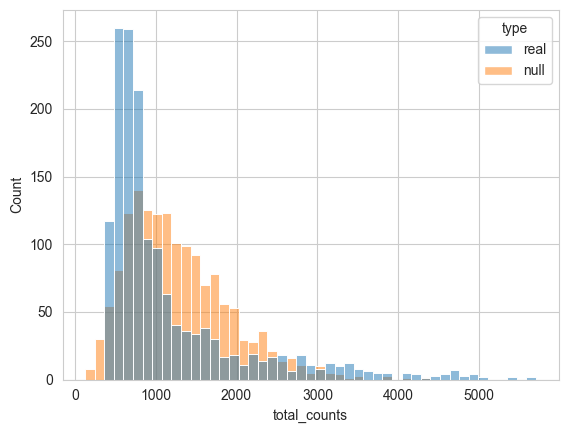

In [45]:
sns.histplot(cell_df, x="total_counts", hue="type")

In [46]:
# Plot only 100.000 randomly sampled correlations instaed of ~30M
rng = np.random.default_rng(1234)
all_counts = pd.DataFrame({"count_orig": data_gene_nonzero.layers["counts"].toarray().flatten(), "count_gen": data_null_gen.layers["counts"].flatten()})
count_pairs = all_counts.groupby(['count_orig','count_gen']).size().reset_index().rename(columns={0:'count'})
count_pairs["log_count"] = np.log(count_pairs["count"])
count_pairs = count_pairs.pivot(index="count_gen", columns="count_orig", values="log_count")
count_pairs


count_orig,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,99.0,100.0,101.0,102.0,103.0,104.0,107.0,114.0,129.0,136.0
count_gen,,,,,,,,,,,,,,,,,,,,,
0.0,15.692543,13.361837,11.672175,10.088638,8.978913,8.072467,7.407924,6.830874,6.406880,6.028279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,13.396948,11.976238,10.620595,9.345832,8.398860,7.667626,7.093405,6.565265,6.196444,5.805135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2.0,11.835321,10.833583,9.721666,8.674368,7.908755,7.280008,6.701960,6.378426,5.918894,5.480639,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3.0,10.465814,9.809452,8.899867,8.075583,7.441907,6.916715,6.418365,5.924256,5.616771,5.257495,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4.0,9.251866,8.924257,8.256867,7.596894,7.016610,6.439350,6.063785,5.669881,5.370638,5.049856,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
all_counts.reset_index()

,index,count_orig,count_gen
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,1.0
3,3,0.0,0.0
4,4,0.0,1.0
...,...,...,...
8563019,8563019,0.0,0.0
8563020,8563020,0.0,0.0
8563021,8563021,1.0,1.0
8563022,8563022,6.0,3.0


In [48]:
all_counts_long = pd.wide_to_long(all_counts.reset_index(), stubnames="count", i="index", j="type", sep="_", suffix=r'\w+').reset_index()
all_counts_long

,index,type,count
0,0,orig,0.0
1,1,orig,0.0
2,2,orig,0.0
3,3,orig,0.0
4,4,orig,0.0
...,...,...,...
17126043,8563019,gen,0.0
17126044,8563020,gen,0.0
17126045,8563021,gen,1.0
17126046,8563022,gen,3.0


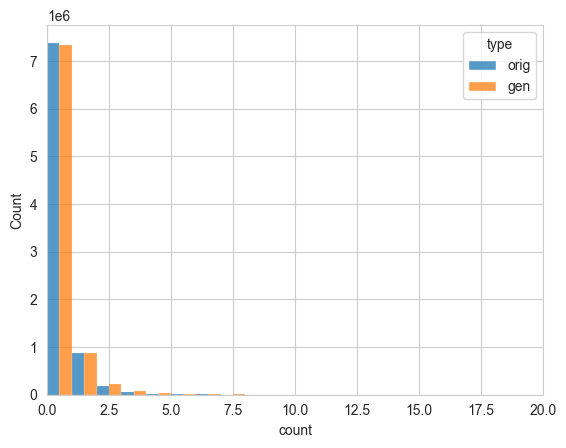

In [49]:
g = sns.histplot(all_counts_long, x="count", hue="type", binwidth=1, multiple="dodge")
g.set(xlim=(0, 20))
plt.show()